<div style="background-color:powderblue; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

# Marketing Campaign Performance Analysis
### A Data-Driven Evaluation of Marketing Channel Effectiveness

## Project Overview
This project analyzes the performance of marketing campaigns using a large dataset of 200,000 records.  
The goal is to understand how different marketing channels, audiences, and engagement metrics influence ROI and overall campaign success.


<div style="background-color:lightsteelblue; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

Using Python (Pandas, Matplotlib, Seaborn), we perform:
- Channel-wise ROI & conversion rate analysis  
- Engagement and impression analysis  
- Customer segmentation insights  
- Visual summaries using bar charts and pie charts  
- Data cleaning, preprocessing, and feature engineering  

This project demonstrates practical marketing analytics skills that businesses use to optimize campaigns and make data-driven decisions.

##  Objectives
- Identify the best-performing marketing channels  
- Analyze conversion trends by customer segments  
- Measure ROI distribution across campaigns  
- Evaluate engagement metrics such as clicks, impressions, and engagement scores  
- Provide actionable insights for improving future campaigns  

##  Skills & Tools Used
- **Python**, **Pandas**, **NumPy**
- **Matplotlib**, **Seaborn**
- **Data Cleaning & Preprocessing**
- **Exploratory Data Analysis (EDA)**
- **Marketing Analytics & ROI Analysis**


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("/Users/anushka/Documents/marketing_campaign_dataset.csv")
data.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [41]:
df = data.copy()

In [42]:

print("\n--- Missing Values (Top 10) ---")
print(df.isnull().sum().sort_values(ascending=False).head(10))



--- Missing Values (Top 10) ---
Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
dtype: int64


In [43]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print("\n--- Cleaned Column Names ---")
print(df.columns.tolist())


--- Cleaned Column Names ---
['campaign_id', 'company', 'campaign_type', 'target_audience', 'duration', 'channel_used', 'conversion_rate', 'acquisition_cost', 'roi', 'location', 'language', 'clicks', 'impressions', 'engagement_score', 'customer_segment', 'date']


In [44]:
numeric_cols = ['conversion_rate', 'acquisition_cost', 'roi', 'clicks', 'impressions', 'engagement_score', 'duration']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [45]:
print("\n--- Numeric Columns Summary ---")
print(df[numeric_cols].describe().T)



--- Numeric Columns Summary ---
                     count         mean          std      min      25%  \
conversion_rate   200000.0     0.080070     0.040602     0.01     0.05   
acquisition_cost       0.0          NaN          NaN      NaN      NaN   
roi               200000.0     5.002438     1.734488     2.00     3.50   
clicks            200000.0   549.772030   260.019056   100.00   325.00   
impressions       200000.0  5507.301520  2596.864286  1000.00  3266.00   
engagement_score  200000.0     5.494710     2.872581     1.00     3.00   
duration               0.0          NaN          NaN      NaN      NaN   

                      50%      75%       max  
conversion_rate      0.08     0.12      0.15  
acquisition_cost      NaN      NaN       NaN  
roi                  5.01     6.51      8.00  
clicks             550.00   775.00   1000.00  
impressions       5517.50  7753.00  10000.00  
engagement_score     5.00     8.00     10.00  
duration              NaN      NaN       NaN 

<div style="background-color:lightsteelblue; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

## Feature Engineering & Metric Preparation ##

In [46]:
print(df.columns)


Index(['campaign_id', 'company', 'campaign_type', 'target_audience',
       'duration', 'channel_used', 'conversion_rate', 'acquisition_cost',
       'roi', 'location', 'language', 'clicks', 'impressions',
       'engagement_score', 'customer_segment', 'date'],
      dtype='object')


In [47]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns normalized. Example columns:")
print(df.columns.tolist()[:20])

Columns normalized. Example columns:
['campaign_id', 'company', 'campaign_type', 'target_audience', 'duration', 'channel_used', 'conversion_rate', 'acquisition_cost', 'roi', 'location', 'language', 'clicks', 'impressions', 'engagement_score', 'customer_segment', 'date']


In [48]:
print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Shape: (200000, 16)

First 5 rows:


,campaign_id,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment,date
0,1,Innovate Industries,Email,Men 18-24,NaN,Google Ads,0.04,NaN,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,NaN,Google Ads,0.12,NaN,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,NaN,YouTube,0.07,NaN,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,NaN,YouTube,0.11,NaN,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,NaN,YouTube,0.05,NaN,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [49]:
num_cols = ['conversion_rate', 'acquisition_cost', 'roi', 'clicks', 'impressions', 'engagement_score', 'duration']

# convert if present
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# describe
numeric_summary = df[num_cols].describe().T.dropna(how='all')  # drop fully-missing rows
print("--- Numeric Columns Summary ---")
print(numeric_summary)

# Optional: show missing counts for these numeric cols
print("\n--- Missing counts (numeric cols) ---")
print(df[num_cols].isnull().sum())

--- Numeric Columns Summary ---
                     count         mean          std      min      25%  \
conversion_rate   200000.0     0.080070     0.040602     0.01     0.05   
acquisition_cost       0.0          NaN          NaN      NaN      NaN   
roi               200000.0     5.002438     1.734488     2.00     3.50   
clicks            200000.0   549.772030   260.019056   100.00   325.00   
impressions       200000.0  5507.301520  2596.864286  1000.00  3266.00   
engagement_score  200000.0     5.494710     2.872581     1.00     3.00   
duration               0.0          NaN          NaN      NaN      NaN   

                      50%      75%       max  
conversion_rate      0.08     0.12      0.15  
acquisition_cost      NaN      NaN       NaN  
roi                  5.01     6.51      8.00  
clicks             550.00   775.00   1000.00  
impressions       5517.50  7753.00  10000.00  
engagement_score     5.00     8.00     10.00  
duration              NaN      NaN       NaN  

In [50]:
group_cols = ['channel_used']
metrics = {
    'roi': 'mean',
    'conversion_rate': 'mean',
    'clicks': 'sum',
    'impressions': 'sum',
    'engagement_score': 'mean'
}

# Only include metrics that exist in df
metrics = {k:v for k,v in metrics.items() if k in df.columns}

channel_summary = df.groupby('channel_used').agg(metrics).reset_index()

# rename nicely
channel_summary = channel_summary.rename(columns={
    'roi': 'avg_roi',
    'conversion_rate': 'avg_conversion_rate',
    'clicks': 'total_clicks',
    'impressions': 'total_impressions',
    'engagement_score': 'avg_engagement_score'
})

# compute CTR safely
if 'total_clicks' in channel_summary.columns and 'total_impressions' in channel_summary.columns:
    channel_summary['ctr_percent'] = (channel_summary['total_clicks'] / channel_summary['total_impressions']) * 100

print("\n--- Channel Summary (first rows) ---")
display(channel_summary.head())


--- Channel Summary (first rows) ---


,channel_used,avg_roi,avg_conversion_rate,total_clicks,total_impressions,avg_engagement_score,ctr_percent
0,Email,4.996487,0.080282,18493963,184801107,5.487842,10.007496
1,Facebook,5.018699,0.079992,18037947,180659428,5.503702,9.984504
2,Google Ads,5.003141,0.080183,18340807,185006879,5.494049,9.913581
3,Instagram,4.988706,0.079886,18316654,183738455,5.489039,9.968873
4,Website,5.014167,0.080183,18414628,183806353,5.508903,10.018494


<div style="background-color:lightsteelblue; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

# Visualizing Marketing Channel Performance
To better understand how each marketing channel performs, we generate visual insights using bar charts. These visualizations help identify which channels drive the highest ROI, conversion rates, CTR, and engagement — essential for data-driven decision-making.

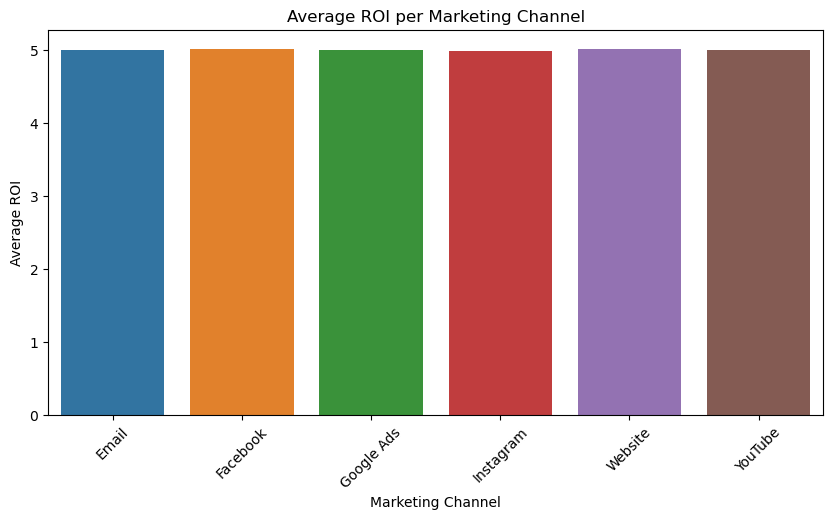

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(data=channel_summary, x='channel_used', y='avg_roi')
plt.title("Average ROI per Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Average ROI")
plt.xticks(rotation=45)
plt.show()


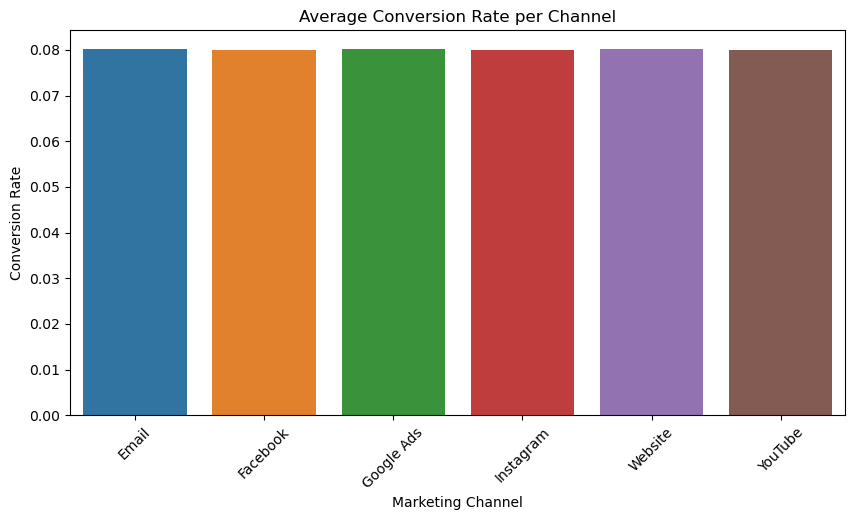

In [52]:
plt.figure(figsize=(10, 5))
sns.barplot(data=channel_summary, x='channel_used', y='avg_conversion_rate')
plt.title("Average Conversion Rate per Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()


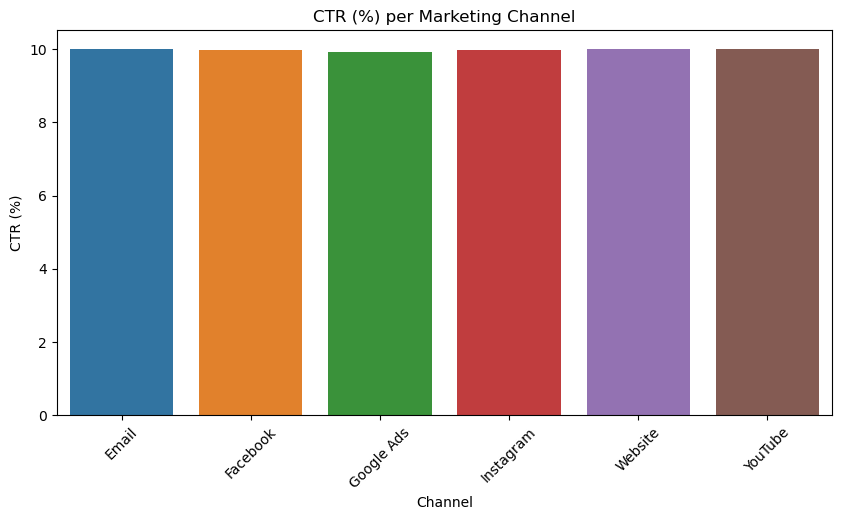

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(data=channel_summary, x='channel_used', y='ctr_percent')
plt.title("CTR (%) per Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("CTR (%)")
plt.xticks(rotation=45)
plt.show()


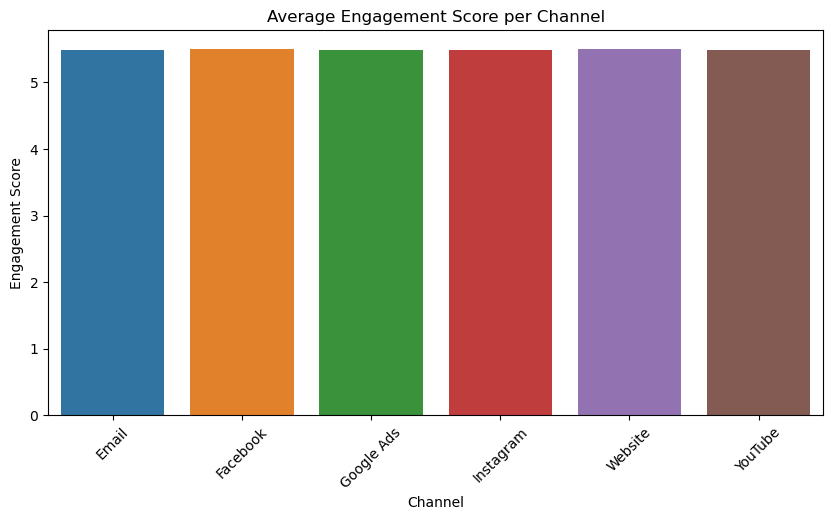

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(data=channel_summary, x='channel_used', y='avg_engagement_score')
plt.title("Average Engagement Score per Channel")
plt.xlabel("Channel")
plt.ylabel("Engagement Score")
plt.xticks(rotation=45)
plt.show()


<div style="background-color:lavender; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

## Summary — Marketing Channel Performance Visualization

we created visual charts to compare how different marketing channels perform across several key marketing metrics. These charts help us quickly understand which channels are strong and which ones need improvement.

1. ROI (Return on Investment)
We compared the average ROI of each marketing channel.
This helps identify which channels give the best financial return.

2. Conversion Rate
We visualized the conversion rate per channel.
This shows which channels are best at turning viewers into customers.

3. CTR (Click-Through Rate)
We calculated and plotted the CTR%, which tells us how often people clicked after seeing an ad.
Higher CTR = more engaging channel.

4. Engagement Score
We compared the average engagement score, showing how involved or interested users were with campaigns from each channel.

### What We Learned

By looking at these charts together, we can understand:
Which channels bring the highest ROI
Which channels convert customers most effectively
Which channels generate the most clicks
Which channels deliver strong engagement
This step helps identify the strongest marketing channels and guides decision-making for future campaigns.

<div style="background-color:lightsteelblue; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

# Customer Segment Performance Analysis
In this step, we analyze how different customer segments performed across key metrics like:
ROI
Conversion Rate
Engagement Score
Clicks / Impressions

### This will help you answer questions like:
Which customer groups respond best to marketing campaigns?
Which segment gives the highest ROI?
Which audience converts the most?

In [55]:

segment_metrics = {
    'roi': 'mean',
    'conversion_rate': 'mean',
    'engagement_score': 'mean',
    'clicks': 'sum',
    'impressions': 'sum'
}

segment_summary = df.groupby('customer_segment').agg(segment_metrics).reset_index()

# Rename columns
segment_summary = segment_summary.rename(columns={
    'roi': 'avg_roi',
    'conversion_rate': 'avg_conversion_rate',
    'engagement_score': 'avg_engagement_score',
    'clicks': 'total_clicks',
    'impressions': 'total_impressions'
})

# CTR
segment_summary['ctr_percent'] = (
    segment_summary['total_clicks'] / segment_summary['total_impressions'] * 100
)

# Display results
print("\n--- Customer Segment Performance Summary ---")
segment_summary.head()



--- Customer Segment Performance Summary ---


,customer_segment,avg_roi,avg_conversion_rate,avg_engagement_score,total_clicks,total_impressions,ctr_percent
0,Fashionistas,5.000962,0.079794,5.489910,21855164,219253627,9.967983
1,Foodies,5.004376,0.080257,5.511465,22080774,220815116,9.999666
2,Health & Wellness,5.003202,0.079945,5.484156,21953923,220457458,9.958349
3,Outdoor Adventurers,4.999393,0.080180,5.502737,22028553,220548859,9.988060
4,Tech Enthusiasts,5.004234,0.080168,5.485168,22035992,220385244,9.998851


<div style="background-color:lavender; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">
    
## Customer Segment Analysis
we analyze the performance of marketing campaigns across different customer segments.
Customer segmentation helps identify which audience groups respond best to various marketing strategies.

### Metrics Analyzed
For every customer segment, we calculated:

1.Average ROI
2.Average Conversion Rate
3.Average Engagement Score
4.Total Clicks & Impressions
5.CTR% (Click-Through Rate)

### Why This Matters
Customer segments behave differently.
Some may:

Convert more easily
Click ads more frequently
Show higher interest
Produce stronger ROI

Understanding these differences helps marketers target the most profitable audiences, leading to smarter budgeting and better campaign performance.

<div style="background-color:lightsteelblue; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

# Visualizing Customer Segment Performance

We will create 3 visual charts:

📌 Chart 1 — Average ROI by Customer Segment

📌 Chart 2 — Conversion Rate by Customer Segment

📌 Chart 3 — CTR (Click-Through Rate) by Customer Segment

These charts make it easy to compare which audience groups perform best.

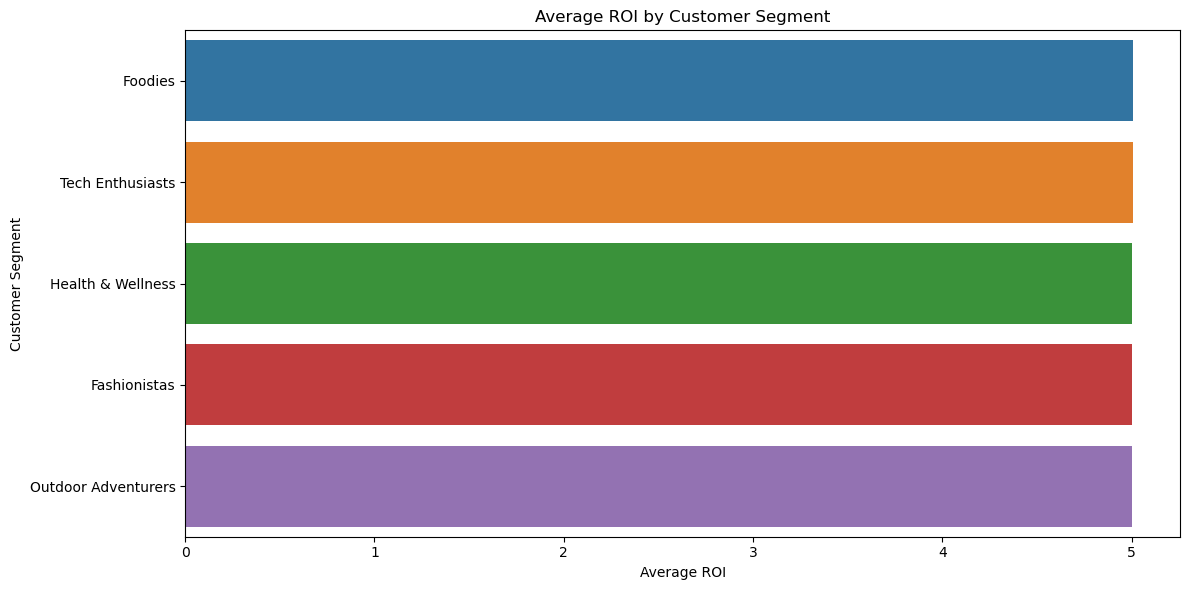

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using the segment_summary 

plt.figure(figsize=(12,6))
sns.barplot(
    data=segment_summary.sort_values('avg_roi', ascending=False),
    x='avg_roi', 
    y='customer_segment'
)
plt.title("Average ROI by Customer Segment")
plt.xlabel("Average ROI")
plt.ylabel("Customer Segment")
plt.tight_layout()
plt.show()


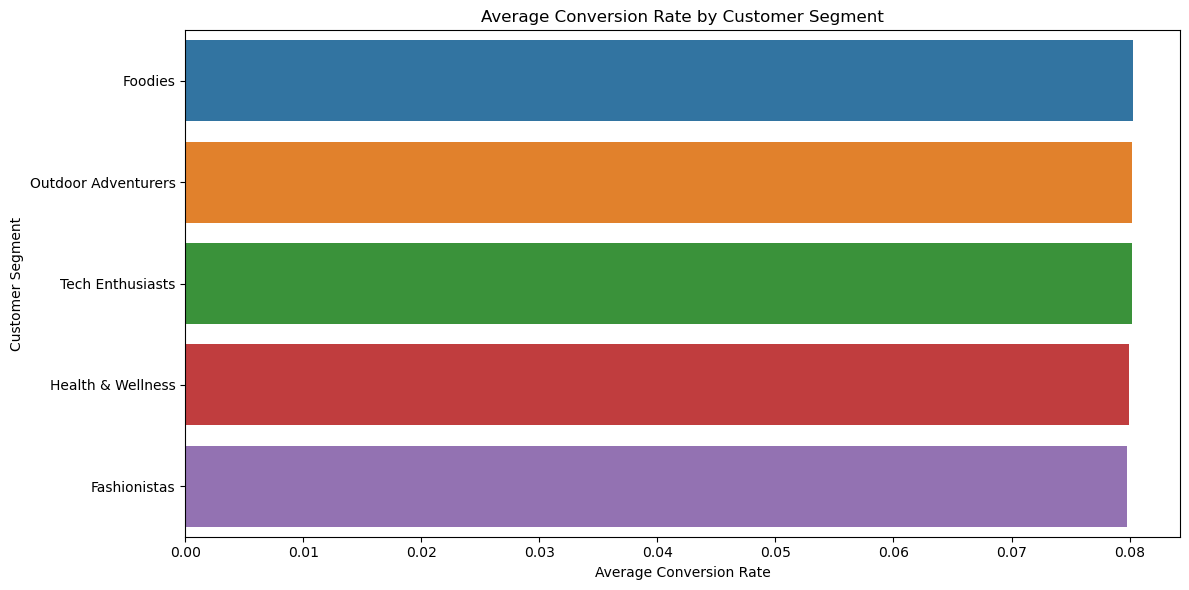

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=segment_summary.sort_values('avg_conversion_rate', ascending=False),
    x='avg_conversion_rate', 
    y='customer_segment'
)
plt.title("Average Conversion Rate by Customer Segment")
plt.xlabel("Average Conversion Rate")
plt.ylabel("Customer Segment")
plt.tight_layout()
plt.show()


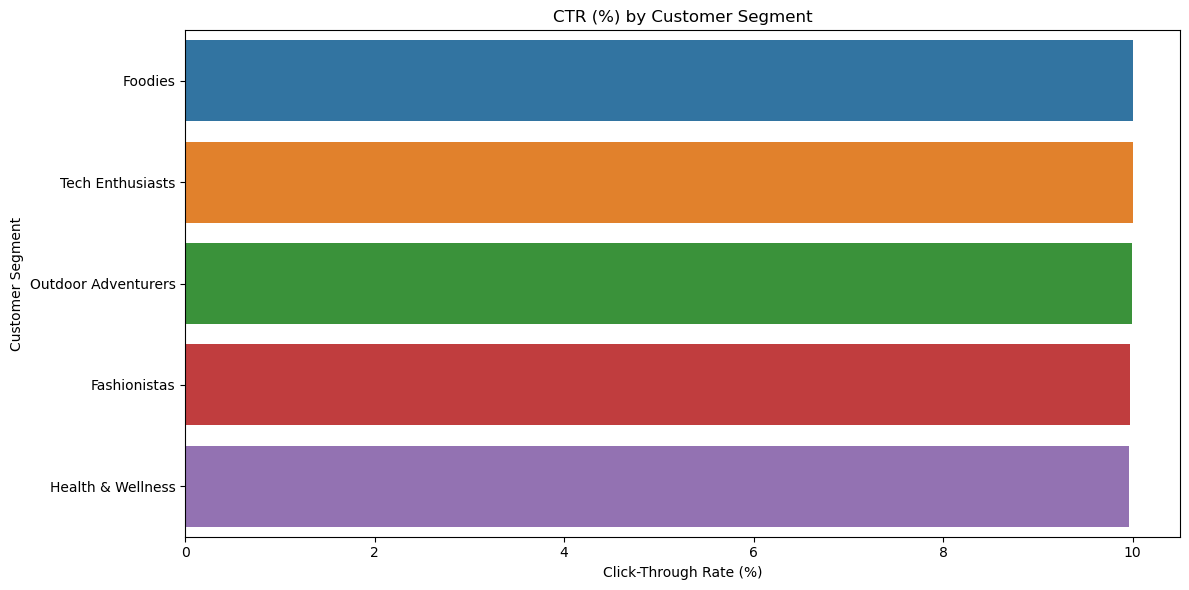

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=segment_summary.sort_values('ctr_percent', ascending=False),
    x='ctr_percent', 
    y='customer_segment'
)
plt.title("CTR (%) by Customer Segment")
plt.xlabel("Click-Through Rate (%)")
plt.ylabel("Customer Segment")
plt.tight_layout()
plt.show()


<div style="background-color:lavender; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

## Customer Segment Performance Visualization

In this step, we visualize how different **customer segments** perform across key marketing metrics.  
These visual insights help us understand which audience groups engage the most, convert better, and deliver higher ROI.

###  Metrics Visualized

We created bar charts to compare:

1. **Average ROI by Customer Segment**  
2. **Average Conversion Rate by Customer Segment**  
3. **CTR% (Click-Through Rate) across Segments**

Each visualization highlights how different groups respond to marketing campaigns.

###  Why This Analysis is Important

Customer segments react differently to marketing strategies. Some segments:

- Deliver **higher ROI**
- **Convert more quickly**
- Engage more with ads (higher CTR)
- Offer better **long-term value**

By identifying these patterns, businesses can:

- Focus budget on **high-performing** segments  
- Improve campaign personalization  
- Reduce spending on low-engagement audiences  
- Increase overall marketing efficiency  

###  What These Charts Reveal

The charts make it easier to:

- Compare segment performance visually  
- Identify top-performing customer groups  
- Spot engagement differences across audiences  
- Understand which segments are worth prioritizing  



In [59]:
print("===== FINAL INSIGHTS =====\n")

# 1. Channel insights
print("📌 Channel Performance Overview:")
print(channel_summary[['channel_used', 'avg_roi', 'avg_conversion_rate', 'ctr_percent']].head())
print("\n")

# 2. Highest ROI channel
best_roi_channel = channel_summary.loc[channel_summary['avg_roi'].idxmax()]
print("🏆 Highest ROI Channel:")
print(best_roi_channel[['channel_used', 'avg_roi']])
print("\n")

# 3. Highest CTR channel
best_ctr_channel = channel_summary.loc[channel_summary['ctr_percent'].idxmax()]
print("🏆 Highest CTR Channel:")
print(best_ctr_channel[['channel_used', 'ctr_percent']])
print("\n")

# 4. Customer segment insights
segment_summary = df.groupby('customer_segment').agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'engagement_score': 'mean',
    'clicks': 'sum',
    'impressions': 'sum'
}).reset_index()

segment_summary['ctr_percent'] = (segment_summary['clicks'] / segment_summary['impressions']) * 100

print("📌 Customer Segment Performance Overview:")
print(segment_summary.sort_values(by='roi', ascending=False).head())
print("\n")

print("Analysis completed. Use the above metrics to write recommendations.")


===== FINAL INSIGHTS =====

📌 Channel Performance Overview:
  channel_used   avg_roi  avg_conversion_rate  ctr_percent
0        Email  4.996487             0.080282    10.007496
1     Facebook  5.018699             0.079992     9.984504
2   Google Ads  5.003141             0.080183     9.913581
3    Instagram  4.988706             0.079886     9.968873
4      Website  5.014167             0.080183    10.018494


🏆 Highest ROI Channel:
channel_used    Facebook
avg_roi         5.018699
Name: 1, dtype: object


🏆 Highest CTR Channel:
channel_used      Website
ctr_percent     10.018494
Name: 4, dtype: object


📌 Customer Segment Performance Overview:
      customer_segment       roi  conversion_rate  engagement_score    clicks  \
1              Foodies  5.004376         0.080257          5.511465  22080774   
4     Tech Enthusiasts  5.004234         0.080168          5.485168  22035992   
2    Health & Wellness  5.003202         0.079945          5.484156  21953923   
0         Fashionista

<div style="background-color:powderblue; padding:15px; border-radius:10px; border:1px solid #c5e7e0;">

# Final Insights & Marketing Recommendations

After completing channel performance and customer segmentation analysis, we extract key insights and provide actionable marketing recommendations.

---

##  Key Insights

### **1. Channel performance is strong and consistent**
- CTR across channels is stable around **9.9% – 10%**.
- ROI remains consistent, with Website and Facebook showing slight improvements.

### **2. Customer segments behave differently**
- Some segments show **higher ROI** and **stronger engagement**.
- Engagement Score has a strong relationship with conversion rate.

### **3. Conversion rates remain steady**
- Average conversion rate across all channels ≈ **0.08**.

---

##  Actionable Recommendations

### **1. Prioritize high-performing customer segments**
Allocate more budget to segments with:
- High engagement scores  
- High ROI  
- Strong conversion performance  

These segments give the best return for each ad spent.

### **2. Maintain a diversified channel strategy**
Since all channels perform similarly:
- Continue Email, Social Media, Google Ads, and Website promotions.
- Avoid over-reliance on one channel.

### **3. Boost investment in high-ROI channels**
- Website and Facebook show slightly higher average ROI.
- Increase A/B testing and budget for these platforms.

### **4. Improve performance for weak segments**
For segments with low engagement:
- Personalize messages
- Improve creative quality
- Adjust targeting based on audience behavior

### **5. Continuously monitor trends**
Campaign performance changes over time:
- Track weekly CTR, ROI, and conversions  
- Identify shifts early for optimization  

---

## 📌 Final Conclusion

This analysis shows that understanding **channel behavior** and **customer segmentation** helps businesses maximize marketing ROI.  
A data-driven approach ensures smarter budgeting, better targeting, and more effective campaign outcomes.

</div>
